# Linear Regression Assignment

## BoomBikes

## Step 1 : Reading the Data

In [74]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Reading the dataset
bikes_df = pd.read_csv("day.csv")

# Reindexing the dataframe

bikes_df = bikes_df.set_index("instant")


In [76]:
bikes_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
# Shape of the dataset
bikes_df.shape

(730, 15)

In [78]:
# Info of the dataset
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


All the values in the dataset seems to be non-null 

In [79]:
# Percentage of notnull values in each column
percent_non_null = (bikes_df.notnull().mean() * 100).round(2)
print(percent_non_null)

dteday        100.0
season        100.0
yr            100.0
mnth          100.0
holiday       100.0
weekday       100.0
workingday    100.0
weathersit    100.0
temp          100.0
atemp         100.0
hum           100.0
windspeed     100.0
casual        100.0
registered    100.0
cnt           100.0
dtype: float64


In [80]:
# Descriptive statistics of the dataset
bikes_df.describe()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning


In [81]:
bikes_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [82]:
bikes_df[["temp","atemp"]].head()

,temp,atemp
instant,,
1,14.110847,18.18125
2,14.902598,17.68695
3,8.050924,9.47025
4,8.200000,10.60610
5,9.305237,11.46350


both temp and atemp have same values, so we need to check if they have same distribution




Text(0, 0.5, 'Frequency')

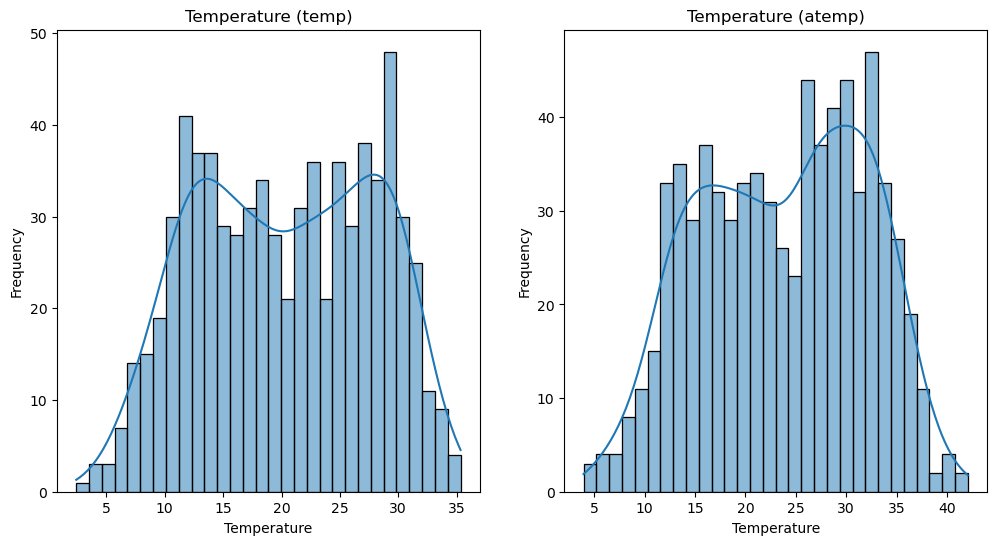

In [83]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bikes_df['temp'], bins=30, kde=True)
plt.title('Temperature (temp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(bikes_df['atemp'], bins=30, kde=True)
plt.title('Temperature (atemp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')



In [84]:
# Finding the correlation between temp and atemp
bikes_df[["temp","atemp"]].corr()



,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


It makes sense that temp and atemp are highly correlated, as they both measure temperature.


In [85]:
# Dropping atemp
bikes_df.drop(columns=["atemp"], inplace=True)

In [86]:
bikes_df[["casual","registered", "cnt"]].head()



,casual,registered,cnt
instant,,,
1,331,654,985
2,131,670,801
3,120,1229,1349
4,108,1454,1562
5,82,1518,1600


In [87]:
# Since the sum of casual and registered is equal to cnt, we can drop casual and registered
bikes_df.drop(columns=["casual","registered"], inplace=True)


In [89]:
bikes_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600
6,06-01-2018,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606
7,07-01-2018,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510
8,08-01-2018,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959
9,09-01-2018,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822


In [92]:
# Extract the day out from dteday
bikes_df["day"] = pd.to_datetime(bikes_df["dteday"], format="%d-%m-%Y").dt.day
bikes_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1
2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,2
3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,3
4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,4
5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,5
6,06-01-2018,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606,6
7,07-01-2018,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510,7
8,08-01-2018,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959,8
9,09-01-2018,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822,9


In [93]:
# Dropping dteday as now the day, month and year are already present
bikes_df.drop(columns=["dteday"], inplace=True)
bikes_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,5
6,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606,6
7,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510,7
8,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959,8
9,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822,9
